## Lead Scopring Case Study

#### Problem Statement:

An education company named X Education sells online courses to industry professionals. However, it's lead conversion rate is very poor. To make this process more efficient, the company wishes to identify the the most promising leads, i.e. the leads that are most likely to convert into paying customers.

The aim is to 
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads with the lead conversion rate to be around 80%.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
#sns.set(style="whitegrid")

%matplotlib inline
pd.set_option('display.max_columns',120)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)
pd.options.display.float_format = '{:.3f}'.format
%config IPCompleter.greedy=True
pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings('ignore')

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

#### Data Dictionary
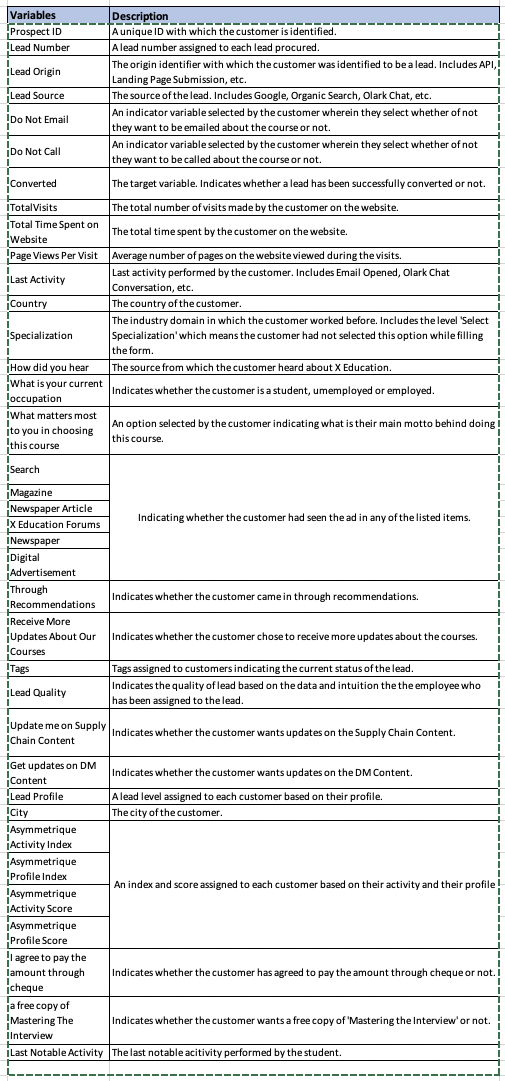

## 1. Data Understanding and Exploration

In [3]:
# Read lead dataset
leads_data = pd.read_csv("Leads.csv")
leads_data.head() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.000,0,0.000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.000,15.000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.000,674,2.500,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.000,15.000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.000,1532,2.000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.000,20.000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.000,305,1.000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.000,17.000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.000,1428,1.000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.000,18.000,No,No,Modified


In [4]:
# let's look at the statistical aspects of the dataframe
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000,9240.000,9103.000,9240.000,9103.000,5022.000,5022.000
mean,617188.436,0.385,3.445,487.698,2.363,14.306,16.345
std,23405.996,0.487,4.855,548.021,2.161,1.387,1.811
min,579533.000,0.000,0.000,0.000,0.000,7.000,11.000
25%,596484.500,0.000,1.000,12.000,1.000,14.000,15.000
50%,615479.000,0.000,3.000,248.000,2.000,14.000,16.000
75%,637387.250,1.000,5.000,936.000,3.000,15.000,18.000
max,660737.000,1.000,251.000,2272.000,55.000,18.000,20.000


In [5]:
leads_data.shape

(9240, 37)

In [6]:
# Let's see the type of each column
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Checking for count of missing values in each column
leads_data.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [8]:
# Check for duplicate rows
print(leads_data.duplicated().sum())

0


### 1.1 Data cleanups

#### Handling of "Select" level in categorical

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

Reason might be that customer may not have selected any value for these on the portal --> hence it remained as Select

In [9]:
# Columns having `Select` as value

select_columns = [col for col in leads_data.columns if len(leads_data[col].isin(['Select']).unique())>1]
select_columns

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [10]:
# Since we reasoned earlier that `Select` values are like Null. So convert to NaN
leads_data = leads_data.replace('Select', np.nan)

In [11]:
# Finding the null percentages across columns
perc_missing_df=100*(leads_data.isna().mean()).sort_values(ascending=False)
perc_missing_df

How did you hear about X Education              78.463
Lead Profile                                    74.188
Lead Quality                                    51.591
Asymmetrique Profile Score                      45.649
Asymmetrique Activity Score                     45.649
Asymmetrique Activity Index                     45.649
Asymmetrique Profile Index                      45.649
City                                            39.708
Specialization                                  36.580
Tags                                            36.288
What matters most to you in choosing a course   29.318
What is your current occupation                 29.113
Country                                         26.634
Page Views Per Visit                             1.483
TotalVisits                                      1.483
Last Activity                                    1.115
Lead Source                                      0.390
Receive More Updates About Our Courses           0.000
I agree to

##### inference : Lot of columns have null values, we decide the cut-off at 39%

In [12]:
### Drop Columns with more than 40% Null Values
col_to_drop = perc_missing_df[perc_missing_df>=39].index.to_list()
leads_data.drop(labels=col_to_drop, axis=1, inplace=True)
print("dropped columns ", col_to_drop)

# Check null % again
100*(leads_data.isna().mean()).sort_values(ascending=False)

dropped columns  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'City']


Specialization                                  36.580
Tags                                            36.288
What matters most to you in choosing a course   29.318
What is your current occupation                 29.113
Country                                         26.634
TotalVisits                                      1.483
Page Views Per Visit                             1.483
Last Activity                                    1.115
Lead Source                                      0.390
Update me on Supply Chain Content                0.000
Get updates on DM Content                        0.000
X Education Forums                               0.000
I agree to pay the amount through cheque         0.000
A free copy of Mastering The Interview           0.000
Receive More Updates About Our Courses           0.000
Through Recommendations                          0.000
Digital Advertisement                            0.000
Newspaper                                        0.000
Prospect I

In [13]:
# Drop `Lead Number` and `Prospect ID` since all unique values and not useful in modelling

leads_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

### 1.2 Analysing categorical variables for usefulness

In [14]:
def categorical_col_plot(col):
    """ For a given categorical col, plat count plot against target variable.  """
    plt.rc('xtick', labelsize=8) 
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
    for c, ax in zip([col], axs.ravel()):
        s1=sns.countplot(x=c, data=leads_data, ax=ax)
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
        s2=sns.countplot(x=leads_data[c], data=leads_data, hue=leads_data.Converted)
        s2.set_xticklabels(s1.get_xticklabels(),rotation=90)

##### 1) Specialization

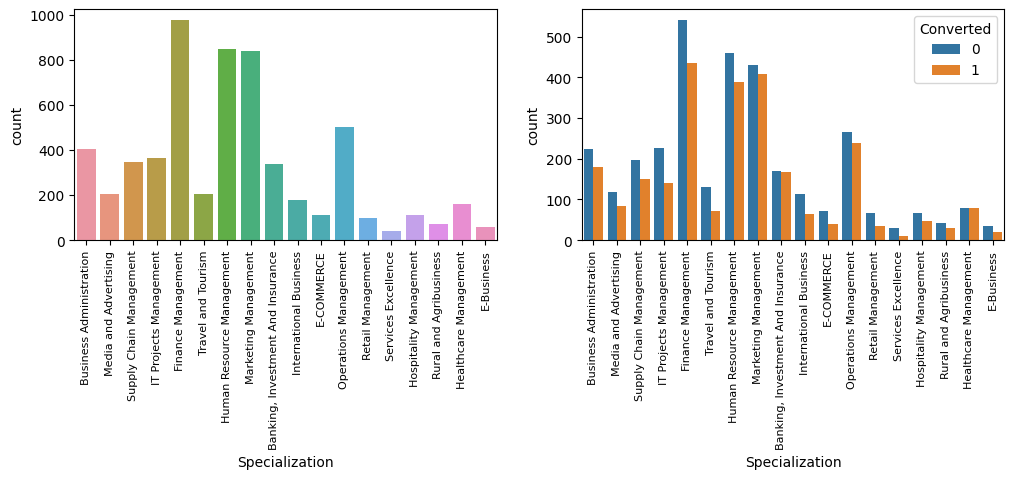

In [15]:
categorical_col_plot('Specialization')

In [16]:
# Since the Specialization column has reasonably distributed data in general and high number of converted leads
#     we will keep this column and impute the missing with e.g. "Unspecified"
leads_data['Specialization'] = leads_data['Specialization'].replace(np.nan, 'Unspecified')

##### Inference
- 'Management' type Specializations have maximum counts and lead conversions. Should focus on these

##### 2) Tags

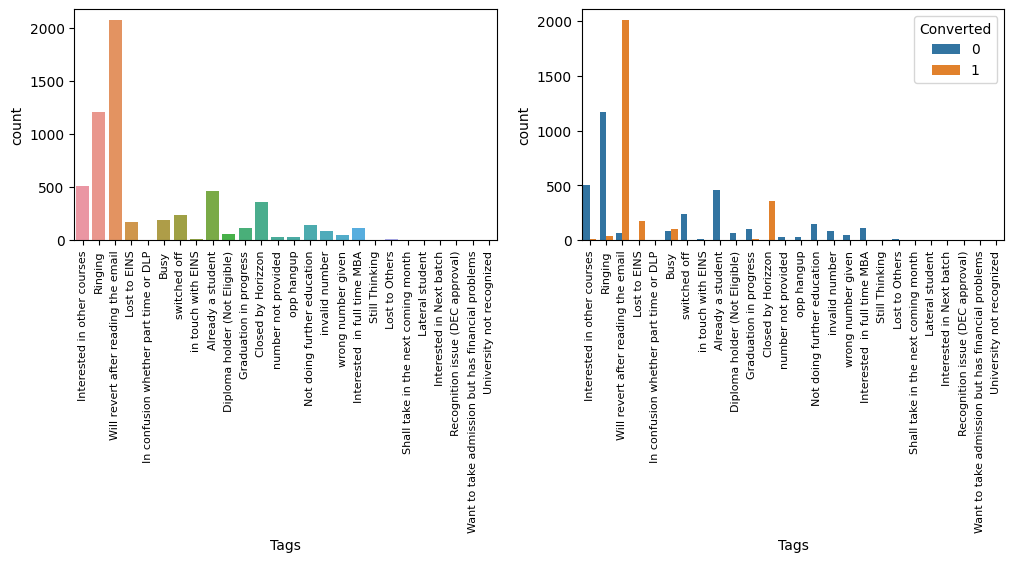

In [17]:
categorical_col_plot('Tags')

##### Inference
- 'Will revert after reading the emails' seems to be maximum converted lead type. 

In [18]:
# Majority of values are 'Will revert after reading the email' and also is mostly Converted, 
# we impute missing values with it.
leads_data['Tags']=leads_data['Tags'].replace(np.nan, 'Unspecified')

In [19]:
leads_data['Tags'].value_counts()

Unspecified                                          3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [20]:
# Observed above some categories in the "Last Activity" have very few records, so grouping these into into "others"
leads_data['Tags'] = leads_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized', 'switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'],
                                                           "Others")

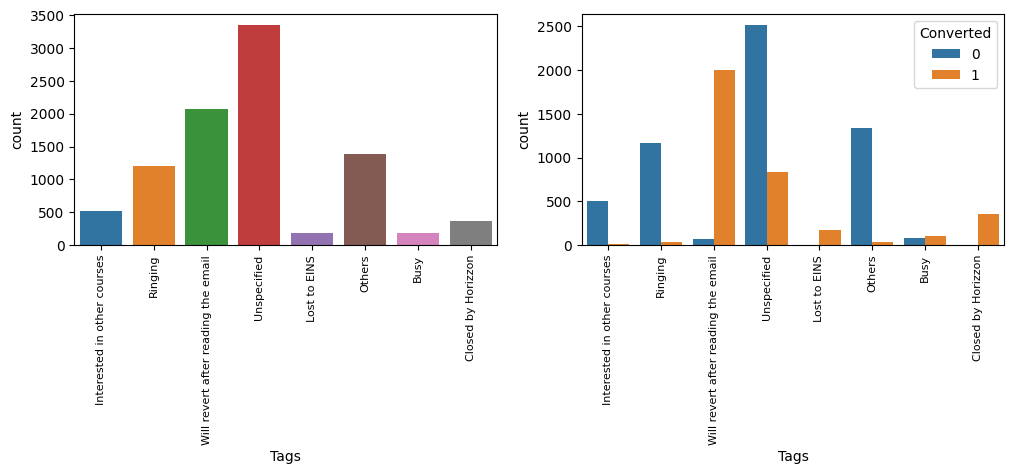

In [21]:
categorical_col_plot('Tags')

#### 3) What matters most to you in choosing a course 

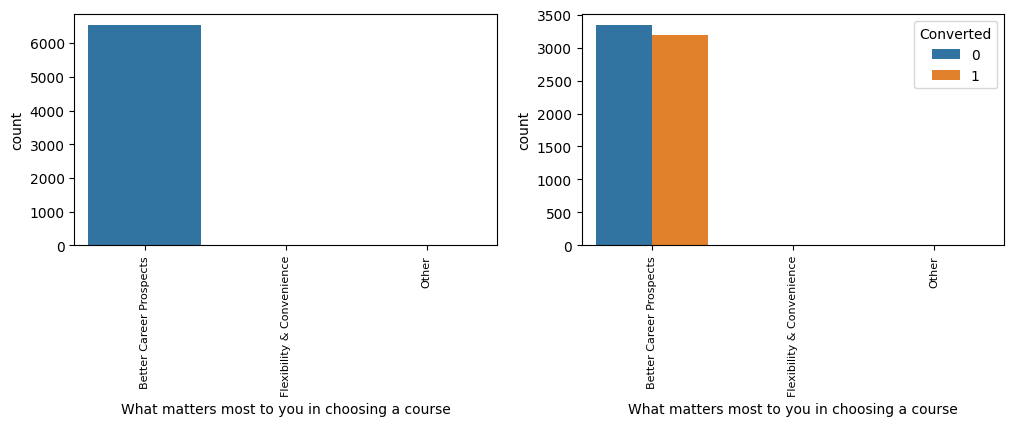

In [22]:
categorical_col_plot('What matters most to you in choosing a course')

In [23]:
# All of values are favoured for the first type. Hence this column is not useful, dropping
leads_data=leads_data.drop('What matters most to you in choosing a course',axis=1)

#### 4) What is your current occupation

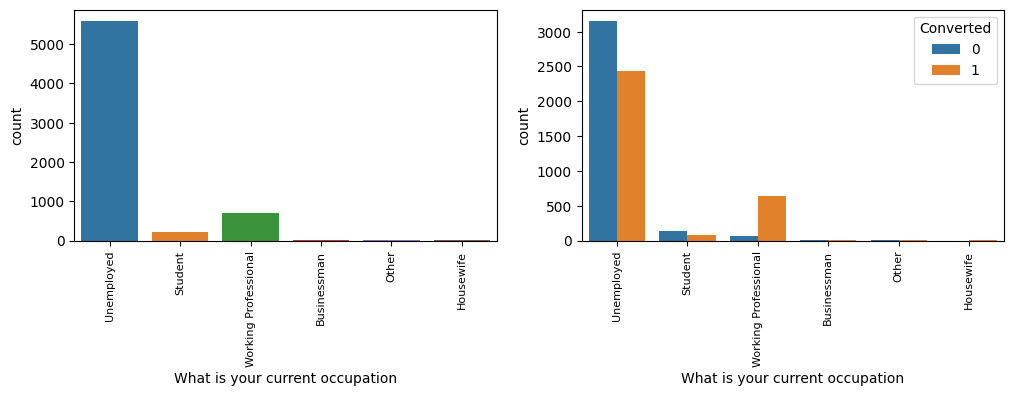

In [24]:
categorical_col_plot('What is your current occupation')

In [25]:
# Majority of values are 'Unemployed' hence imputing with it.
leads_data['What is your current occupation']=leads_data['What is your current occupation'].replace(np.nan,'Unemployed')

##### Inference
- Should focus on "Unemployed" as they convert the most
- 'Working Professions' is another category to focus on

#### 5) Country

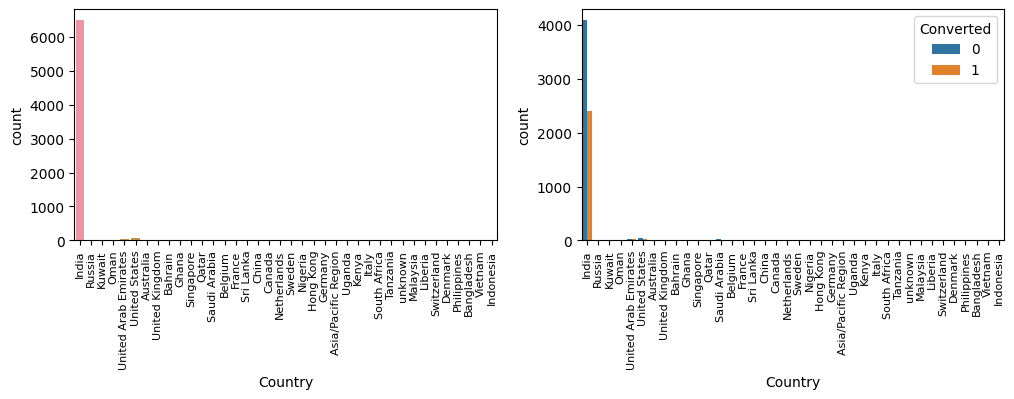

In [26]:
categorical_col_plot('Country')

In [27]:
# > 95% values are for India and this is not a useful column, hence dropping it
leads_data=leads_data.drop('Country',axis=1)

#### 6) TotalVisits

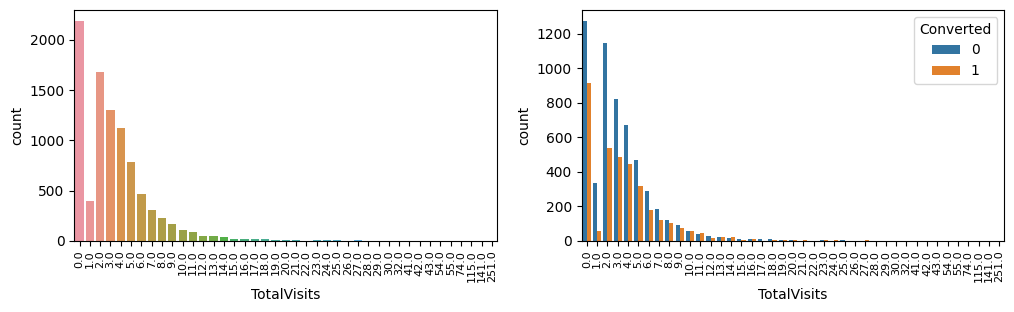

In [28]:
categorical_col_plot('TotalVisits')

In [29]:
# Has just 1.48% null rows, hence we remove the rows with null values without impacting the overall datasize
leads_data = leads_data[~pd.isnull(leads_data['TotalVisits'])]

##### Inference
- Most of the counts are for TotalVisits less than say 8 
- No clear indication as approximately same proportion converted for each value of totalvisits < 8.0

#### 7) Page Views Per Visit

In [30]:
# Has just 1.48% null rows, hence we remove the rows with null values without impacting the overall datasize
leads_data = leads_data[~pd.isnull(leads_data['Page Views Per Visit'])]

#### 8) Last Activity

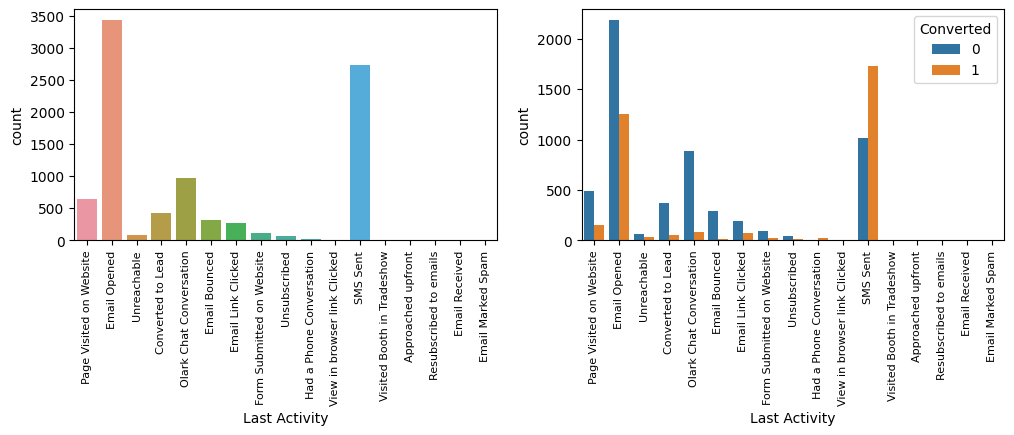

In [31]:
categorical_col_plot('Last Activity')

In [32]:
# Has just 1.1% null rows, hence we remove the rows with null values without impacting the overall datasize
leads_data = leads_data[~pd.isnull(leads_data['Last Activity'])]

##### Inference
- 'Email Opened', 'SMS Sent' have the highest lead counts and shows Highest converted lead.

In [33]:
# Observed above some categories in the "Last Activity" have very few records, so grouping these into into "others"
leads_data['Last Activity'] = leads_data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],
                                                           "Others")

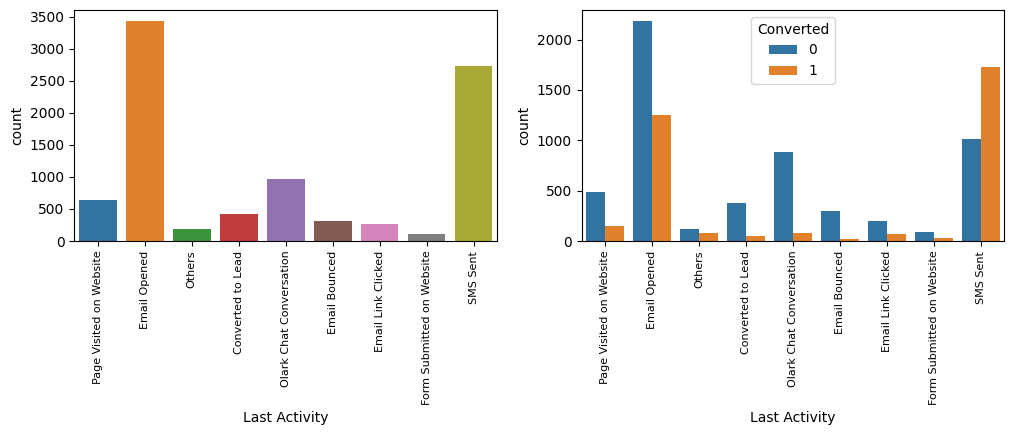

In [34]:
categorical_col_plot('Last Activity')

#### 9) Lead Source

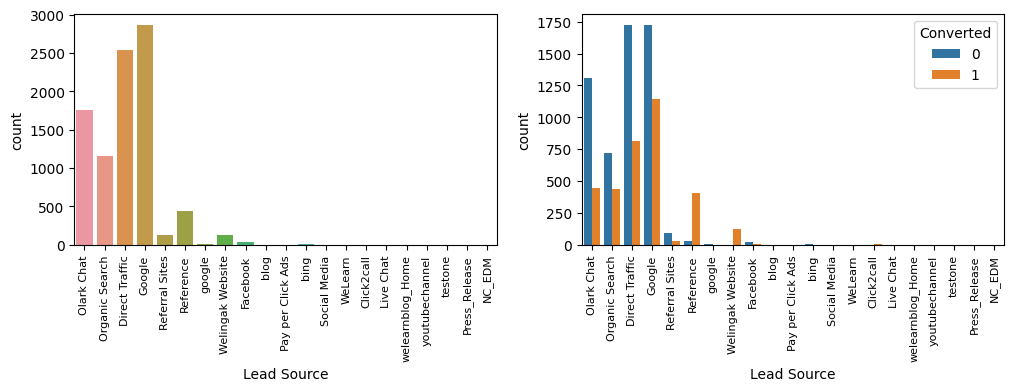

In [35]:
categorical_col_plot('Lead Source')

In [36]:
# Has just 0.3% null rows, hence we remove the rows with null values without impacting the overall datasize
leads_data = leads_data[~pd.isnull(leads_data['Lead Source'])]

In [37]:
# Replace 'google' with 'Google'
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['google'], 'Google')

##### Inference
- 'Google' and 'Direct traffic' have maximum number of leads.
- 'Reference' has quite high conversion, followed by Google.

In [38]:
# Observed above some categories in the "Lead Score" have very few records, so grouping these into into "others"
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 
                                                               'Pay per Click Ads', 'Press_Release','Social Media', 
                                                               'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home',
                                                               'youtubechannel'],
                                                           "Others")

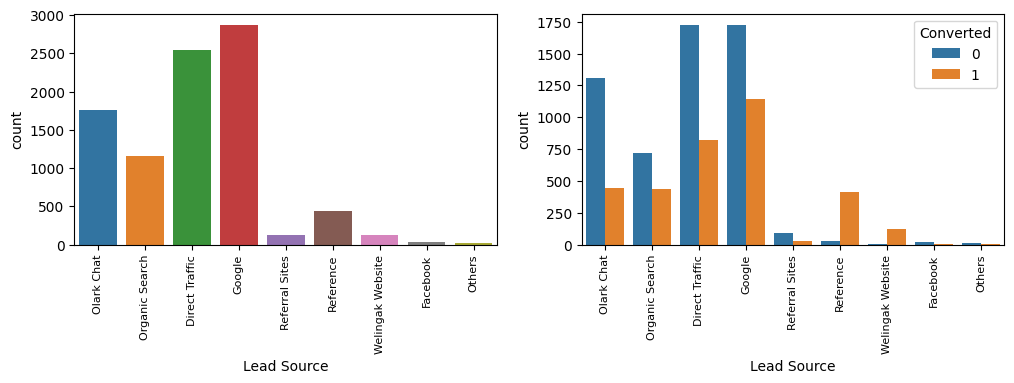

In [39]:
categorical_col_plot('Lead Source')

#### 10) Lead Origin

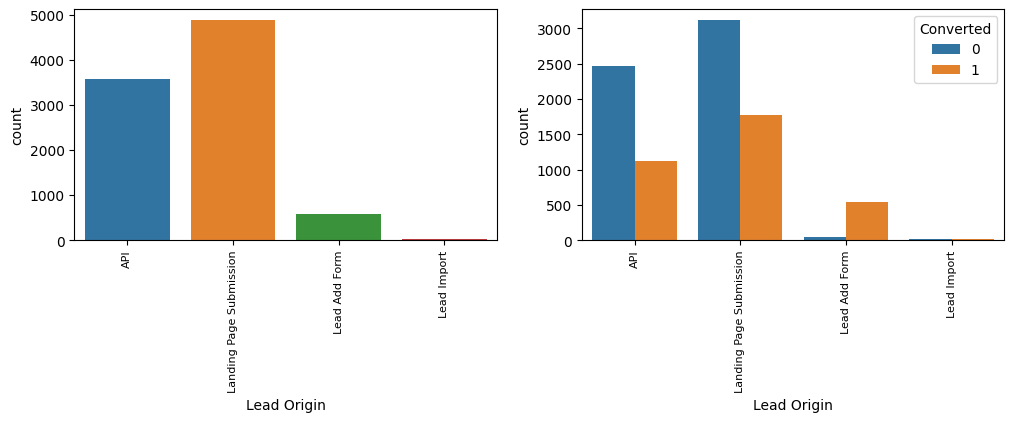

In [40]:
categorical_col_plot('Lead Origin')

##### Inference
- To improve lead conversion rate, focus on 'API' and 'Landing Page Submission'

### 1.3 Treating other categorical variables

In [41]:
# find all other categorical variables
other_cate_columns = ['Lead Origin',
 'Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']


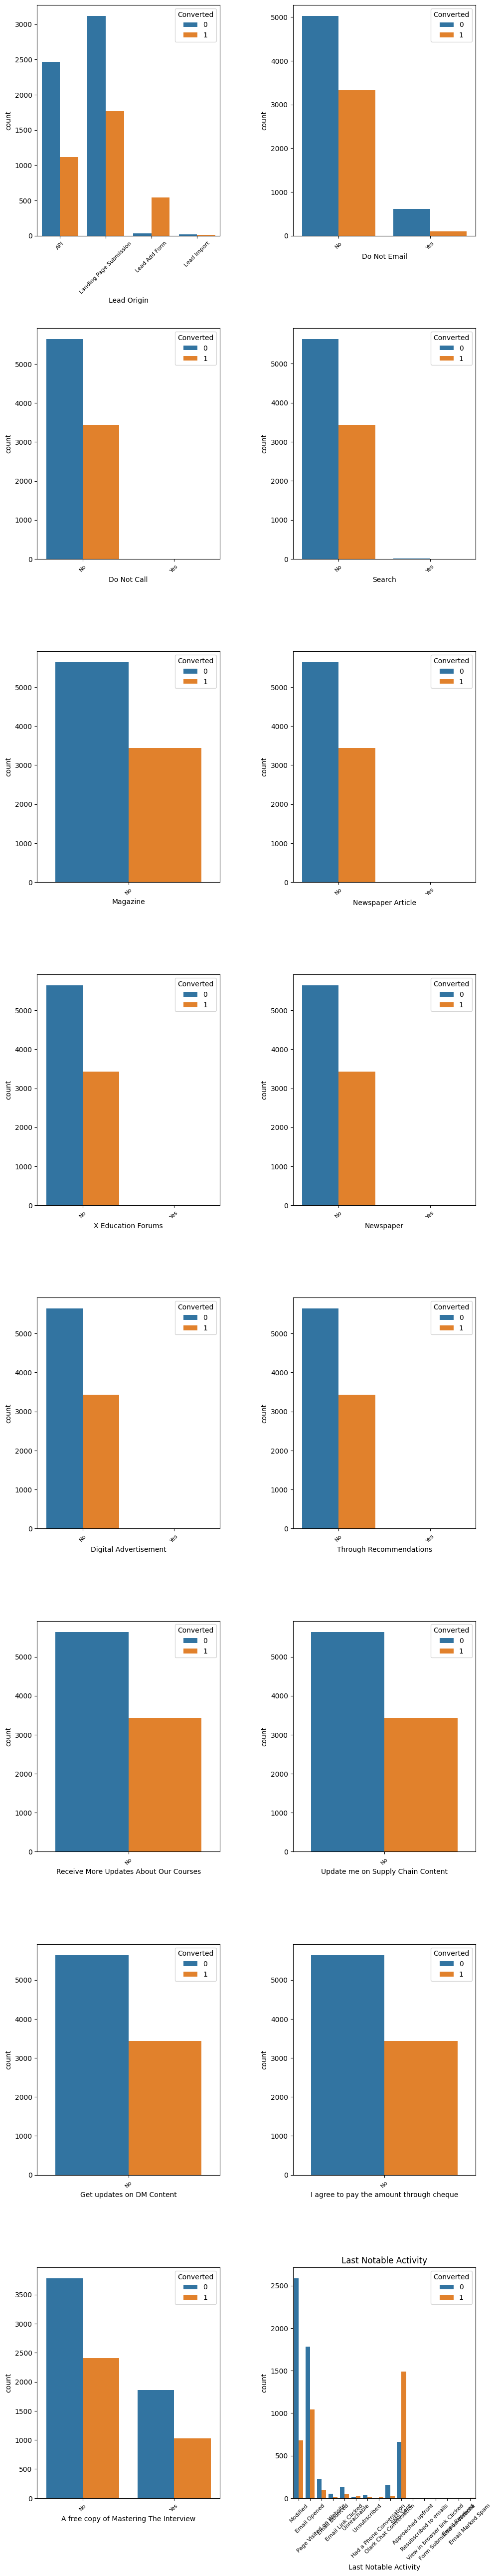

In [42]:
# Plot categorical variables
fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(11, 20))
plt.subplots_adjust(left=0.1,
                    bottom=0.0,
                    right=0.9,
                    top=2.5,
                    wspace=0.4,
                    hspace=0.4)
for col, ax in zip(other_cate_columns, axs.ravel()):
    figsize=(5, 3)
    plt.title(col)
    s1=sns.countplot(x=col, data=leads_data, ax=ax, hue=leads_data.Converted)
    s1.set_xticklabels(s1.get_xticklabels(), rotation=45)

#### Inferences from above

- `Lead Origin`  
   - To improve lead conversion rate, focus on 'API' and 'Landing Page Submission'
- `Do Not Email`
   - Most entries are 'No' Email. Imbalanced. Not much useful parameters.
- `Do Not Call`
   - Most entries are 'No'. Imbalanced. Not much useful parameters.
- `Search`
   - Most entries are 'No'. Imbalanced. Not much useful parameters.
- `Magazine`
   - All are 'No'. Imbalanced. Not much useful parameters.
- `Newspaper Article`
  - Most entries are 'No'. Imbalanced. Not much useful parameters.
- `X Education Forums`
   - Most entries are 'No'. Imbalanced. Not much useful parameters.
- `Newspaper`
   - Most entries are 'No'. Imbalanced. Not much useful parameters.
- `Digital Advertisement`
   - Most entries are 'No'. Imbalanced. Not much useful parameters.
- `Through Recommendations`
   - Most entries are 'No'. Imbalanced. Not much useful parameters.
- `Receive More Updates About Our Courses`
   - All are 'No'. Imbalanced. Not much useful parameters.
- `Update me on Supply Chain Content`
   - All are 'No'. Imbalanced. Not much useful parameters.
- `Get updates on DM Content`
    - All are 'No'. Imbalanced. Not much useful parameters.
- `I agree to pay the amount through cheque`
    - All are 'No'. Imbalanced. Not much useful parameters.
- `A free copy of Mastering The Interview`
   - Not much inference can be drawn from this.
- `Last Notable Activity`
   - 'Email Opened', 'SMS Sent' have the highest lead counts. And 'SMS Sent' shows Highest converted lead.

In [43]:
# Noticed above some categories in the "Last Notable Activity" have very few records, so grouping these into into "others" 
leads_data['Last Notable Activity'] = leads_data['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'], 'Other')

#### Dropping useless categorical columns


In [44]:
# As noted from the inferences above, remove the useless categorical columns.
leads_data = leads_data.drop(['Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'Do Not Call'], 1)
leads_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [45]:
100*(leads_data.isna().mean()).sort_values(ascending=False)

Lead Origin                              0.000
Lead Source                              0.000
Do Not Email                             0.000
Converted                                0.000
TotalVisits                              0.000
Total Time Spent on Website              0.000
Page Views Per Visit                     0.000
Last Activity                            0.000
Specialization                           0.000
What is your current occupation          0.000
Tags                                     0.000
A free copy of Mastering The Interview   0.000
Last Notable Activity                    0.000
dtype: float64

#### What is the size of rows after data cleanup

In [46]:
# How much % or rows we retained after cleanup
(len(leads_data.index)/9240)*100

98.2034632034632

### 1.4 Analysing numerical variables for usefulness

In [47]:
leads_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000,9074.000,9074.000,9074.000
mean,0.379,3.456,482.887,2.370
std,0.485,4.859,545.257,2.161
min,0.000,0.000,0.000,0.000
25%,0.000,1.000,11.000,1.000
50%,0.000,3.000,246.000,2.000
75%,1.000,5.000,922.750,3.200
max,1.000,251.000,2272.000,55.000


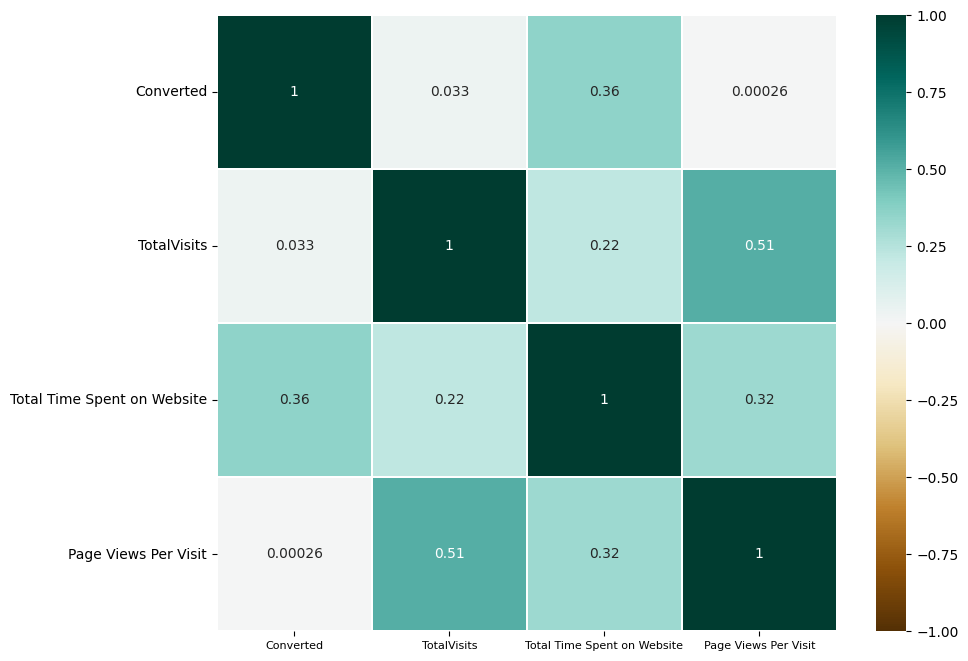

In [48]:
# Observing Correlation

plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads_data.corr(), annot=True,cmap="BrBG", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

#### Inferenence
- `Page Views Per Visit` is correlated with `TotalVisits` column
- `Total Time Spent on Website` is highly coorelated to `Converted`. Hence important in Lead conversion.

## 2. EDA


### `Converted` - distribution and if Imbalanced

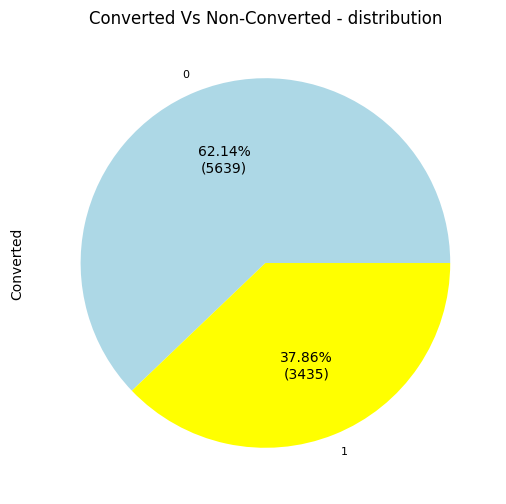

In [49]:
total = len(leads_data["Converted"])
plt.figure(figsize = [6, 6])
plt.title("Converted Vs Non-Converted - distribution")
leads_data["Converted"].value_counts().plot.pie(autopct = lambda x : '{:.2f}%\n({:.0f})'.format(x, total*x/100), colors = ["lightblue", "yellow"])

plt.show()

##### Inference 
Conversion rate is of 37.9% to 62.1% who did not get converted. 
This is ok and not highly skewed.

#### Distribution of numerical data against Converted

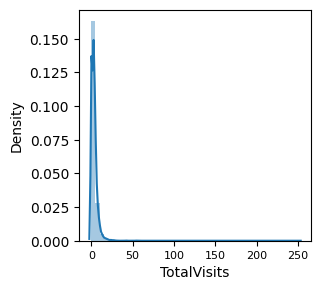

In [50]:
plt.figure(figsize=(3, 3))
sns.distplot(leads_data['TotalVisits'])
plt.show()

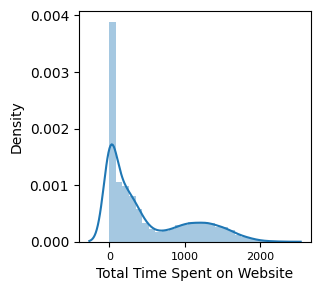

In [51]:
plt.figure(figsize=(3, 3))
sns.distplot(leads_data['Total Time Spent on Website'])
plt.show()

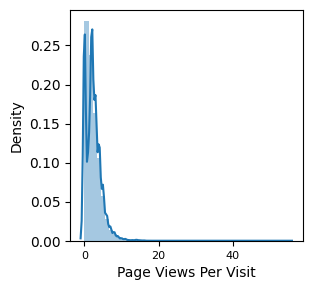

In [52]:
plt.figure(figsize=(3, 3))
sns.distplot(leads_data['Page Views Per Visit'])
plt.show()

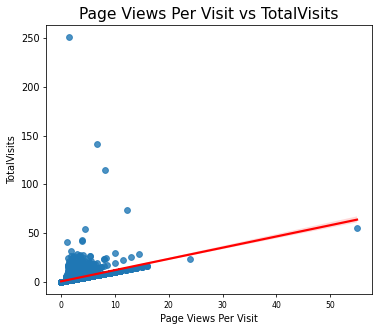

In [53]:
plt.figure(figsize=(6,5),dpi=70)
plt.title("Page Views Per Visit vs TotalVisits",fontsize=16)
sns.regplot(data=leads_data,y="TotalVisits",x="Page Views Per Visit",fit_reg=True, line_kws={"color": "red"})
plt.xlabel("Page Views Per Visit")
plt.show()

##### Inference - `Page Views Per Visit` is positively correlated with `TotalVisits` column

#### Mean distribution of numerical data

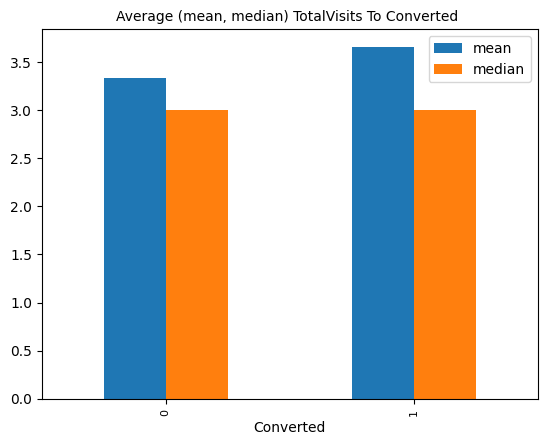

In [54]:
# TotalVisits Plot mean vs Median

leads_data.groupby("Converted")["TotalVisits"].aggregate(["mean","median"]).plot.bar()
plt.rcParams['axes.titlesize'] = 10
plt.title("Average (mean, median) TotalVisits To Converted ")
plt.show()

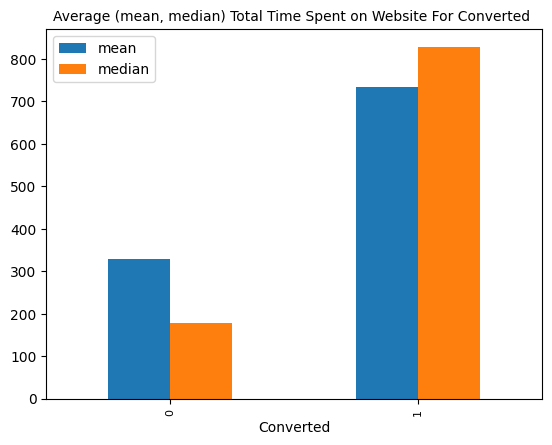

In [55]:
# Total Time Spent on Website Plot mean vs Median
leads_data.groupby("Converted")["Total Time Spent on Website"].aggregate(["mean","median"]).plot.bar()
plt.rcParams['axes.titlesize'] = 10
plt.title("Average (mean, median) Total Time Spent on Website For Converted ")
plt.show()

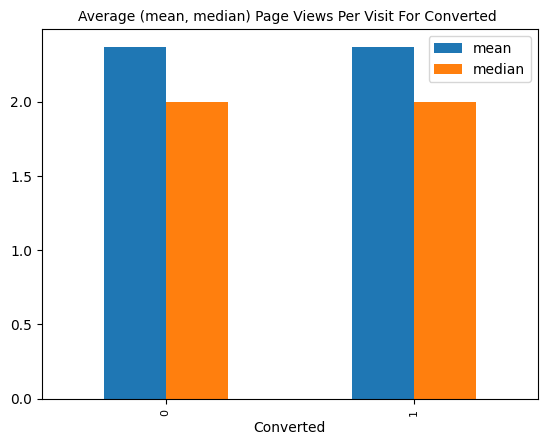

In [56]:
# Page Views Per Visit Plot mean vs Median
leads_data.groupby("Converted")["Page Views Per Visit"].aggregate(["mean","median"]).plot.bar()
plt.rcParams['axes.titlesize'] = 10
plt.title("Average (mean, median) Page Views Per Visit For Converted ")
plt.show()

##### Inference
- `TotalVists` mean distribution is inconclusive of leads conversion indication.
- More the `Total Time Spent on Website`, more is the leads conversion.
- `Page Views Per Visit` mean distribution is inconclusive of leads conversion indication.

### Segmented Univariate Analysis

In [57]:
def plot_cat(cat_var):
    """ Seaborn barplot for the cat_var on the application data against the TARGET var"""
    plt.rcParams['axes.titlesize'] = 13
    plt.title("Target vs " + cat_var)
    s1 = sns.barplot(x=cat_var, y='Converted', data=leads_data)
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    plt.show()
   

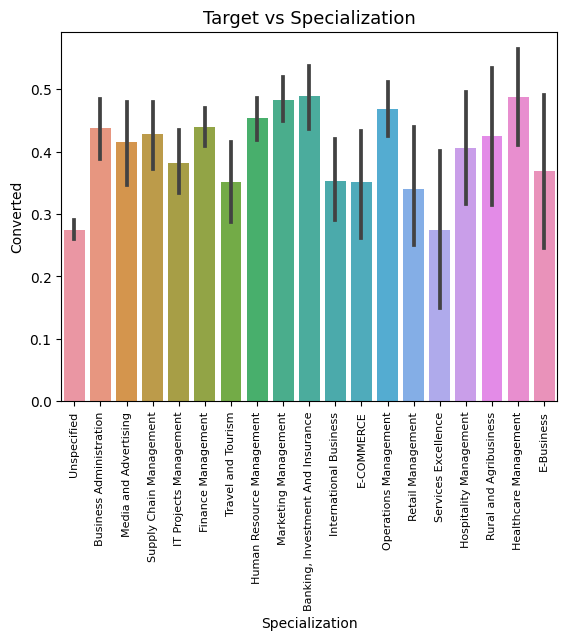

In [58]:
plot_cat("Specialization") 

##### Insights
- There is no particular trend for specific specialization categories to lead to Conversion. 
- However, Banking Investment & Insurance, HealthCare, Operations and Marketing Management shows higher conversions

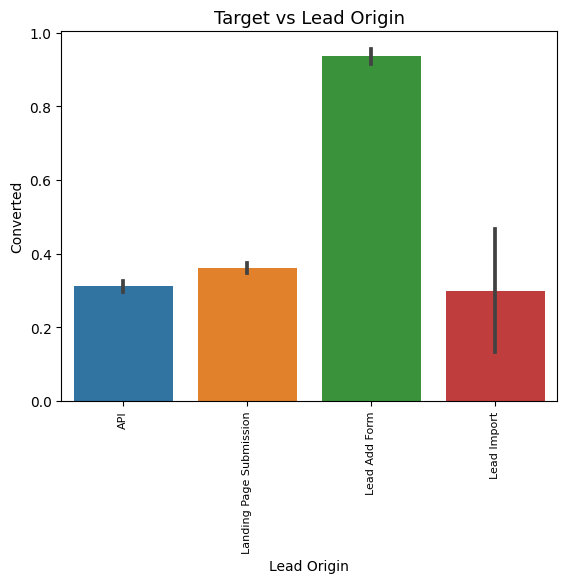

In [59]:
plot_cat("Lead Origin") 

##### Insights
- `Lead Add Form` category has highest lead conversion than others

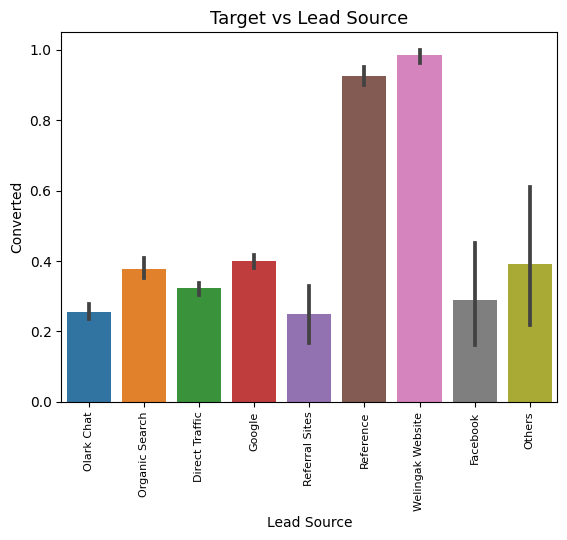

In [60]:
plot_cat("Lead Source") 

##### Insights
- `Reference` & `Wellingak Website` category has highest lead conversion than others
- `Olark chat` & ` reference sites` show poor lead conversion

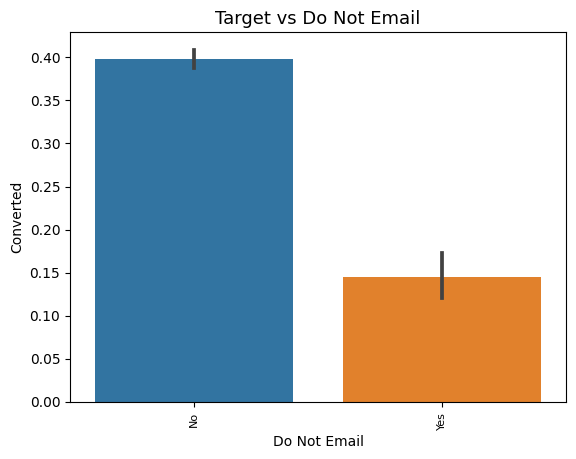

In [61]:
plot_cat("Do Not Email") 

##### Insights
- `Those who email` show more conversion than who do not email.

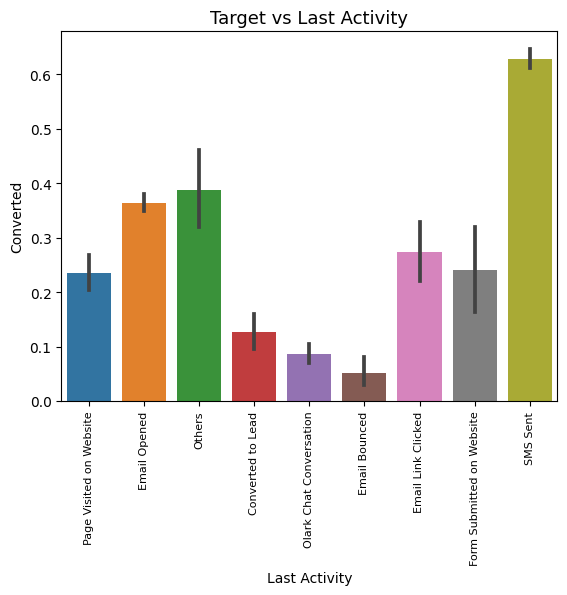

In [62]:
plot_cat("Last Activity") 

##### Insights
- `SMS Sent` has the highest lead conversion followed by `Email Opened`.
- `Email bounced` obviously have lowest conversion since they were not serious and could not be contacted

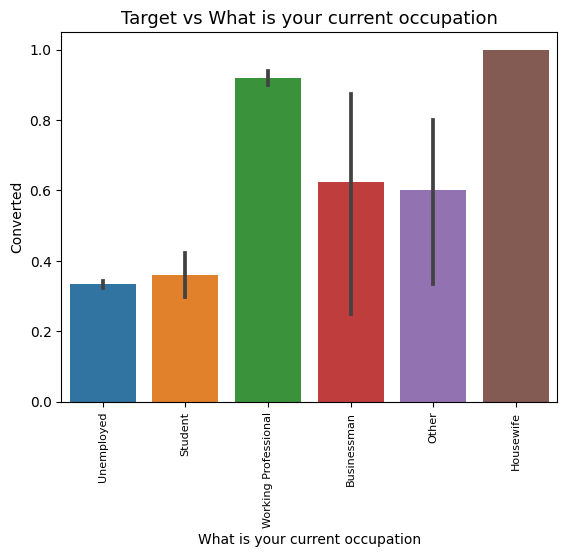

In [63]:
plot_cat("What is your current occupation") 

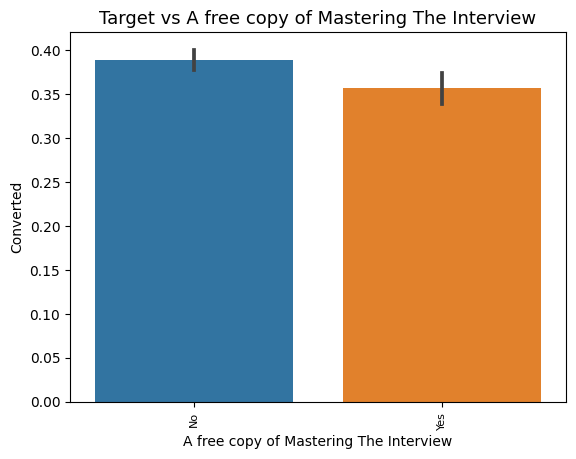

In [64]:
plot_cat("A free copy of Mastering The Interview") 

##### Insights
- There is no particular trend here to lead to Conversion. 

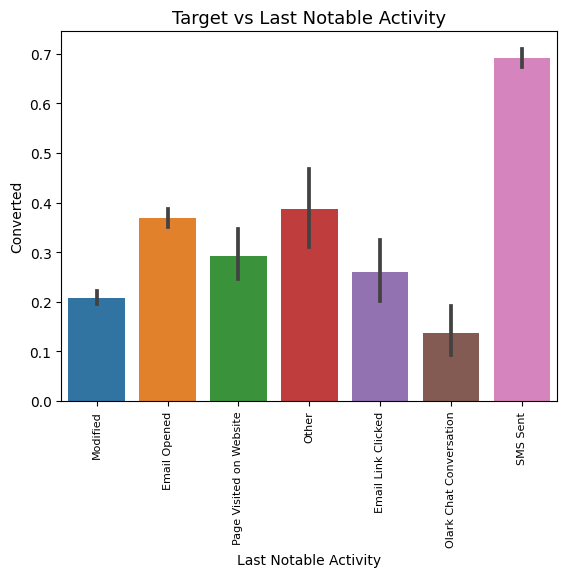

In [65]:
plot_cat("Last Notable Activity") 

##### Insights
- `SMS Sent` have highest conversion rate. Shows those respond with SMS.

### Bivariate EDA analysis

In [66]:
# Split between Converted Vs Not
leads_data_Y = leads_data[leads_data['Converted'] == 1]
leads_data_N = leads_data[leads_data['Converted'] == 0]

In [67]:
# Function to Scatter Plot Target variable with two numeric columns
plt.rc('xtick', labelsize=11) 
plt.rc('ytick', labelsize=11) 
def plot_target_numeric_numeric_subplot(x, y, hue=None):
    """ Using matplotlib subplots, Scatter plots the x, y numeric columns for the Converted and Other data sets."""
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.rcParams["axes.labelsize"] = 8
    plt.rcParams['axes.titlesize'] = 10
    plt.rcParams['axes.titlepad'] = 10

    ax = sns.scatterplot(data=leads_data_Y,x=x, y=y,hue = hue)
    plt.title('Converted')
    ax.set(xlabel=x)
    
    plt.subplot(1,2,2) 
    ax = sns.scatterplot(data=leads_data_N,x=x, y=y,hue = None)
    plt.title('Others')
    ax.set(xlabel=x)  
    plt.show()

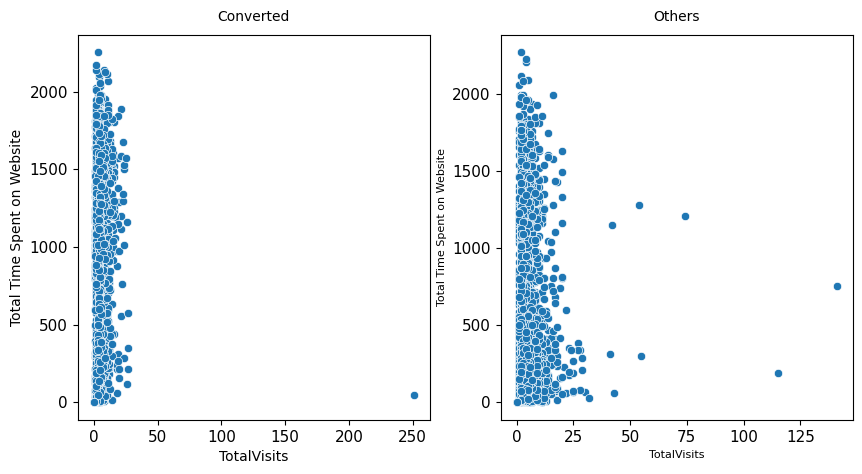

In [68]:
plot_target_numeric_numeric_subplot(x='TotalVisits', y='Total Time Spent on Website')

##### Insights
- Those who lead to Converted, did have lower TotalVisits on the site than those who did not
- Those who lead to Converted, have almost similar trend of "total time spent on the website".

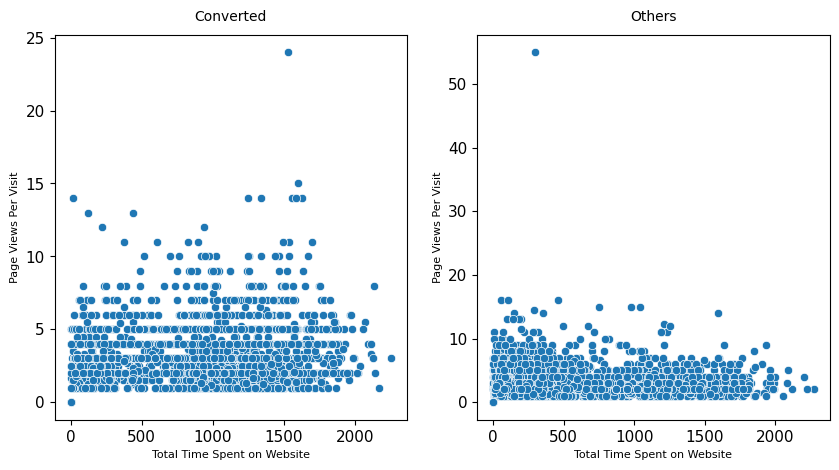

In [69]:
plot_target_numeric_numeric_subplot(x='Total Time Spent on Website', y='Page Views Per Visit')

##### Insights
- For converted, concentration is higher for Page Views than others


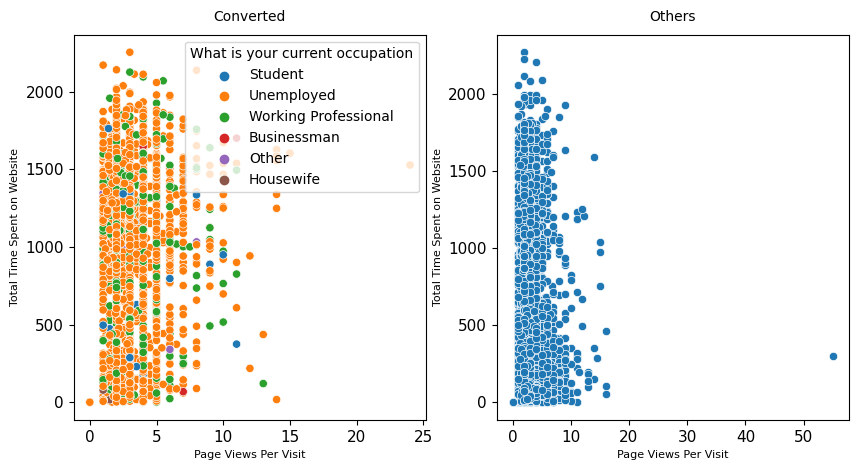

In [70]:

plot_target_numeric_numeric_subplot(x='Page Views Per Visit', y='Total Time Spent on Website', hue='What is your current occupation')

<Figure size 1500x2000 with 0 Axes>

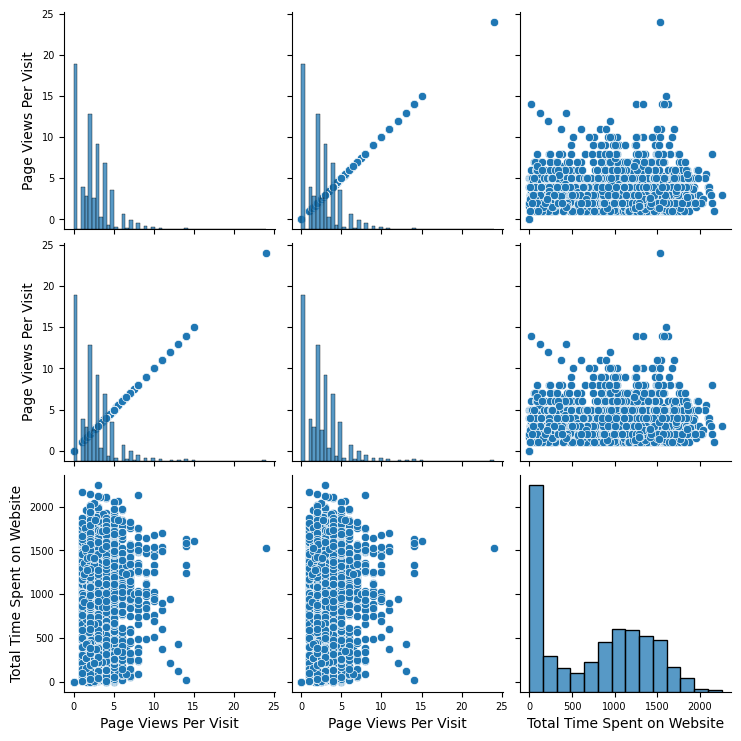

In [71]:
# plot the pair plot of Page Views Per Visit, Page Views Per Visit, Total Time Spent on Website
plt.figure(figsize=(15,20))
plt.rc('xtick', labelsize=7) 
plt.rc('ytick', labelsize=7) 
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 10
ax = sns.pairplot(data=leads_data_Y, vars=["Page Views Per Visit", "Page Views Per Visit", "Total Time Spent on Website"])
plt.show()

#### Categorical - Categorical Bivariate

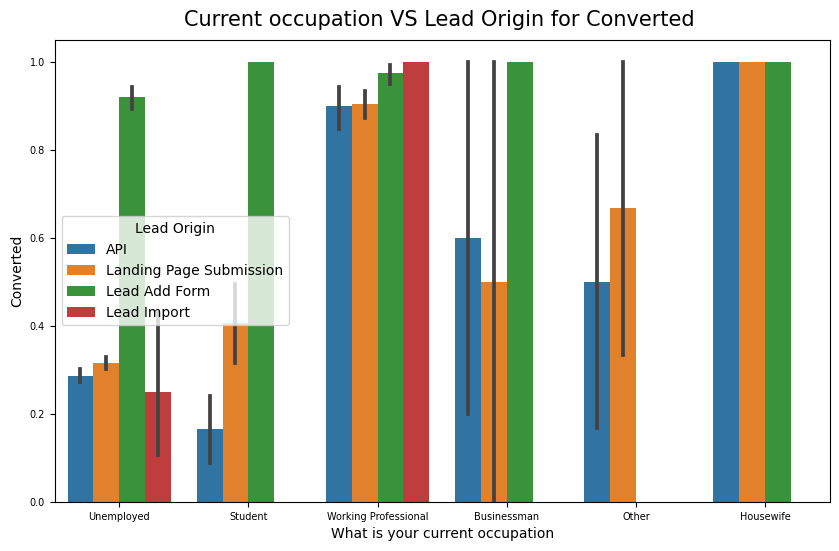

In [72]:
## What is your current occupation VS Lead Origin for Converted 
plt.figure(figsize=[10, 6])
sns.barplot(x='What is your current occupation', y="Converted", hue='Lead Origin', data=leads_data)
plt.title("Current occupation VS Lead Origin for Converted ")
plt.show()

##### Insights
- Housewife and Working Professional show highest and similar conversion across 'Lead Origins'
- `Lead Add Form` has highest conversion amongst all occupations


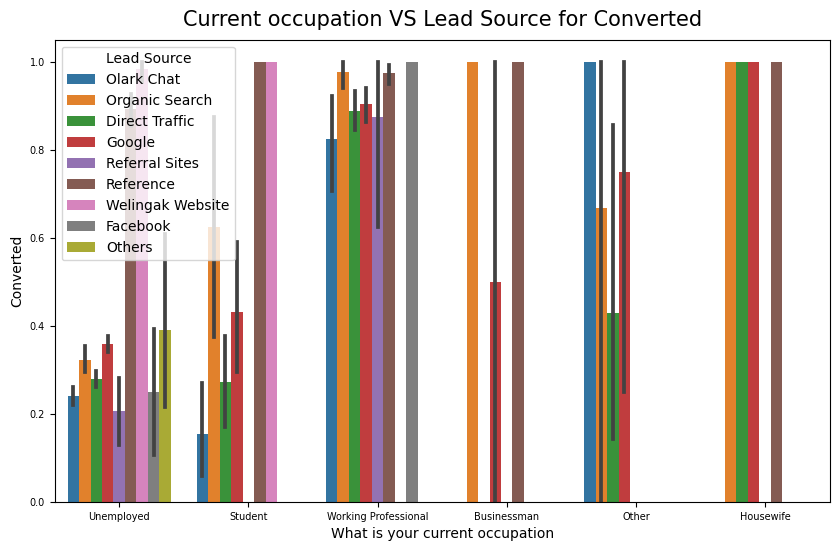

In [73]:
plt.figure(figsize=[10, 6])
sns.barplot(x='What is your current occupation', y="Converted", hue='Lead Source', data=leads_data)
plt.title("Current occupation VS Lead Source for Converted")
plt.show()

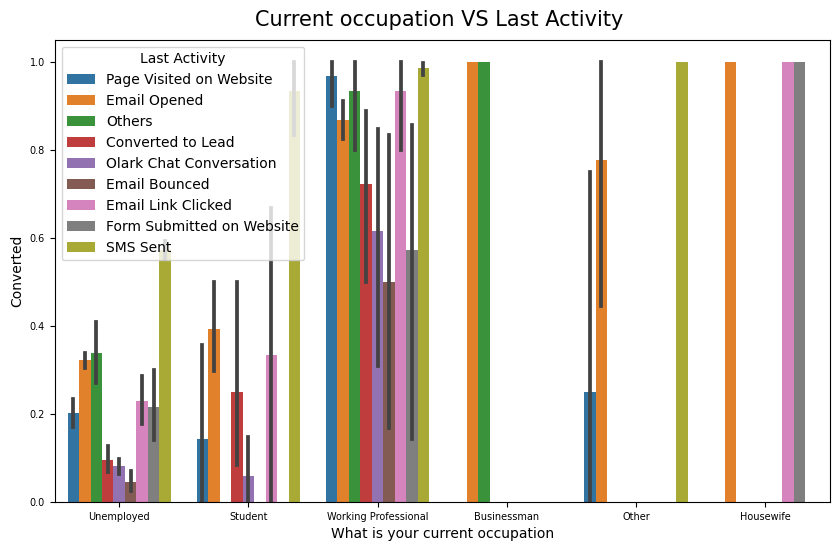

In [74]:
plt.figure(figsize=[10, 6])
sns.barplot(x='What is your current occupation', y="Converted", hue='Last Activity', data=leads_data)
plt.title("Current occupation VS Last Activity ")
plt.show()

## 3. Data Preparation

### Dummy variables for categorical data 

#### Converting some binary variables (Yes/No) to 0/1

In [75]:
vars =  ['Do Not Email', 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leads_data[vars] = leads_data[vars].apply(binary_map)

In [76]:
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.000,0,0.000,Page Visited on Website,Unspecified,Unemployed,Interested in other courses,0,Modified
1,API,Organic Search,0,0,5.000,674,2.500,Email Opened,Unspecified,Unemployed,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.000,1532,2.000,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.000,305,1.000,Others,Media and Advertising,Unemployed,Ringing,0,Modified
4,Landing Page Submission,Google,0,1,2.000,1428,1.000,Converted to Lead,Unspecified,Unemployed,Will revert after reading the email,0,Modified


#### Creating Dummy variables for the categorical features:

In [77]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 
                                   'What is your current occupation', 'Tags', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads_data = pd.concat([leads_data, dummy], axis=1)

In [78]:
# Drop original categorical vars now 
leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 
                                   'What is your current occupation', 'Tags', 'Last Notable Activity'],1)

In [79]:
leads_data.shape

(9074, 61)

### Check for Outliers

In [80]:
# Checking for outliers in the continuous variables
num_leads_data = leads_data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

In [81]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000,9074.000,9074.000
mean,3.456,482.887,2.370
std,4.859,545.257,2.161
min,0.000,0.000,0.000
25%,1.000,11.000,1.000
50%,3.000,246.000,2.000
75%,5.000,922.750,3.200
90%,7.000,1373.000,5.000
95%,10.000,1557.000,6.000
99%,17.000,1839.000,9.000


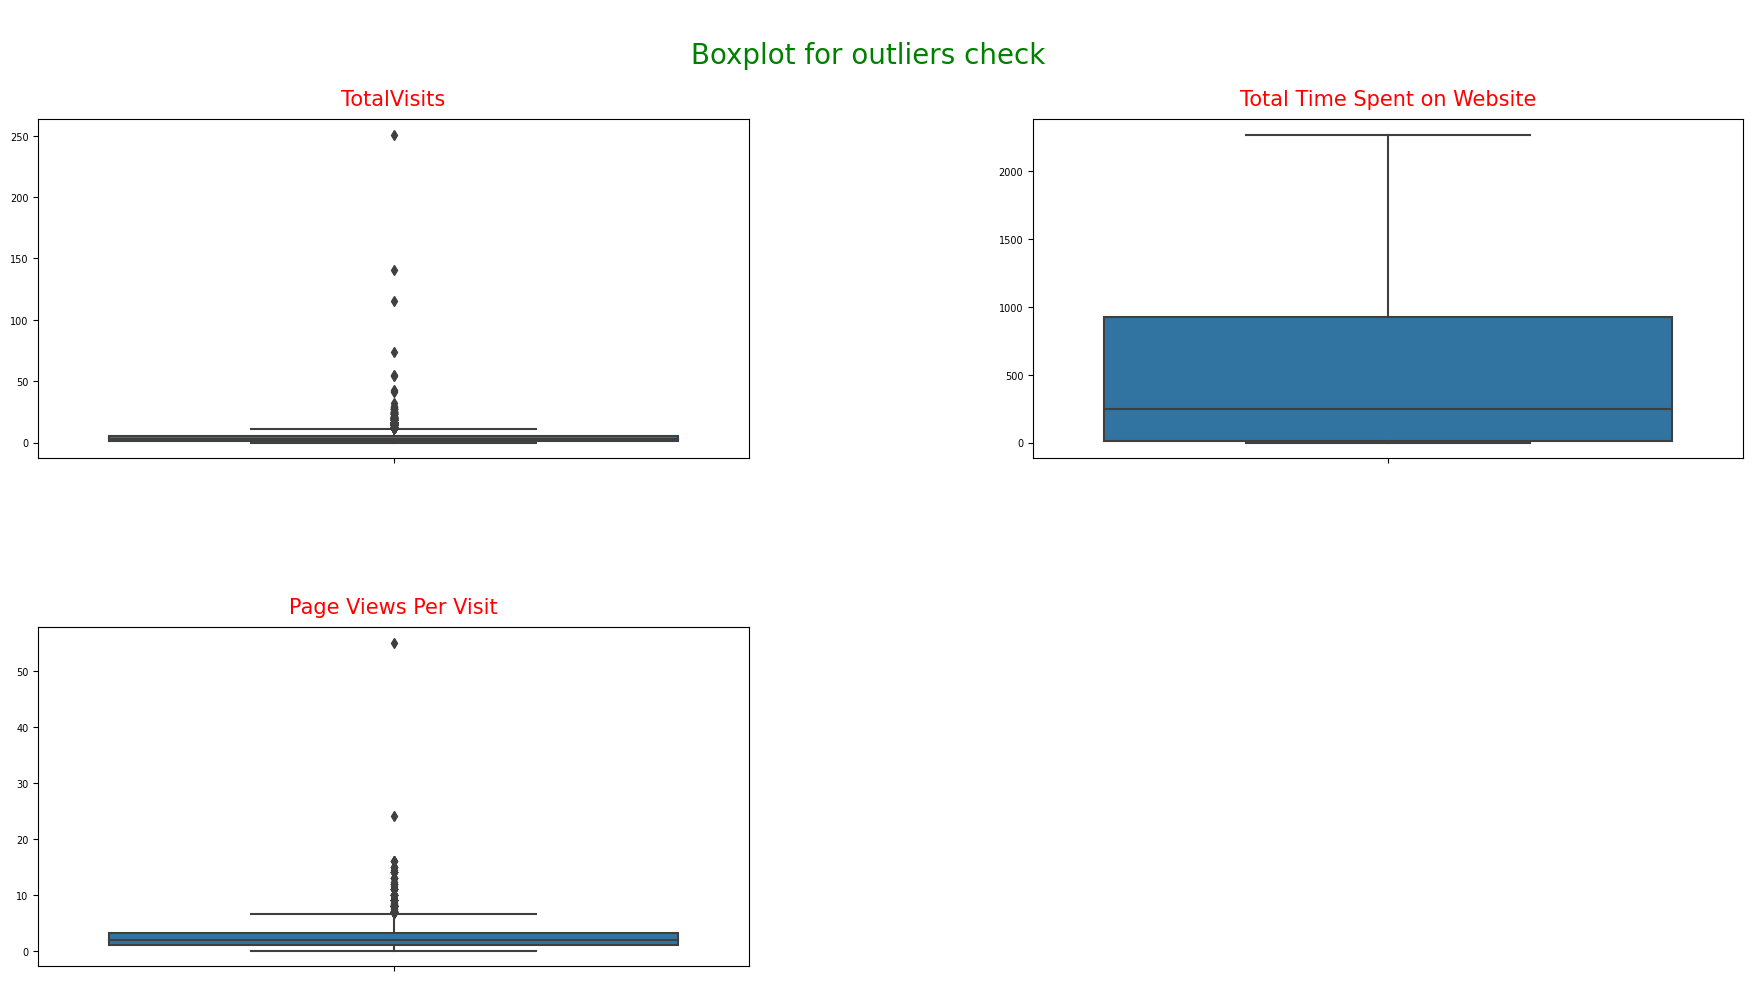

In [82]:
def outliers_plot_numerical_data(df):
    """ Method to boxplot a given numerical column to check outliers """
    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(df.columns):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=num_leads_data[j])

        plt.suptitle("\n Boxplot for outliers check",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j, fontsize=15, color='red')

outliers_plot_numerical_data(num_leads_data)

##### Inference : From the above, "TotalVisits" and "Page Views Per Visit

In [83]:
# Defining UDF to treat outliers via capping and flooring

def outlier_treatment(df, cols):
    """ Caps the outliers for the numerical columns using IQR range"""
    for i in cols:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

        
outlier_treatment(leads_data, ["TotalVisits","Page Views Per Visit"])        

In [84]:
#### Now check the values
num_leads_data = leads_data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]
num_leads_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000,9074.000,9074.000
mean,3.231,482.887,2.286
std,2.881,545.257,1.834
min,0.000,0.000,0.000
25%,1.000,11.000,1.000
50%,3.000,246.000,2.000
75%,5.000,922.750,3.200
90%,7.000,1373.000,5.000
95%,10.000,1557.000,6.000
99%,11.000,1839.000,6.500


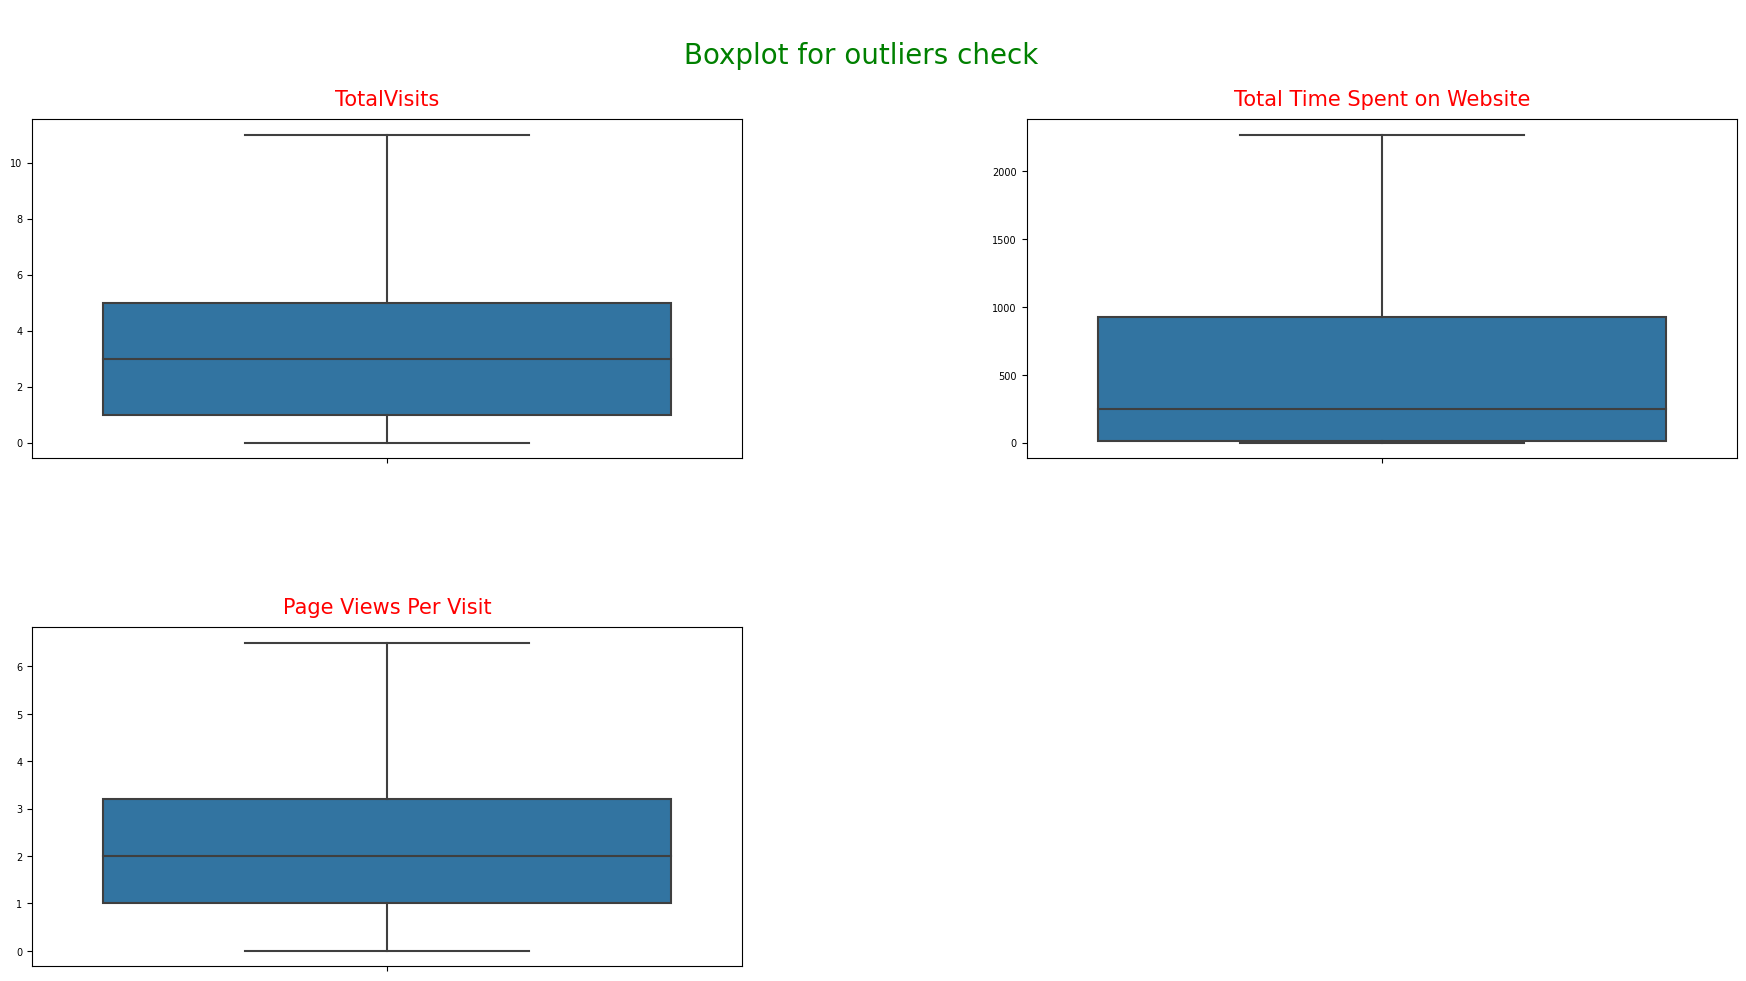

In [85]:
#### And the plots
outliers_plot_numerical_data(num_leads_data)

## 4. Test-Train Split

In [86]:

# Putting predictor variables to X
X = leads_data.drop('Converted', axis=1)

# Putting Target variables to y
y = leads_data["Converted"]

In [87]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 5. Feature Scaling

In [88]:
# using standard scaler for scaling the numerical column data
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])



In [89]:
X_train.shape

(6351, 60)

## 6. Model Building

### Approach

- 15 Best columns are chosen using RFE
- And then manual elimination done using P-value/VIF method.

In [90]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unspecified,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Unspecified,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000,6351.000
mean,0.079,-0.000,-0.000,0.000,0.315,0.536,0.069,0.004,0.004,0.321,0.186,0.127,0.003,0.052,0.013,0.016,0.035,0.028,0.374,0.012,0.105,0.023,0.071,0.308,0.040,0.006,0.012,0.104,0.018,0.012,0.094,0.041,0.020,0.091,0.022,0.055,0.012,0.009,0.004,0.038,0.022,0.363,0.001,0.002,0.022,0.898,0.076,0.034,0.058,0.018,0.149,0.130,0.365,0.226,0.305,0.359,0.019,0.019,0.034,0.244
std,0.270,1.000,1.000,1.000,0.465,0.499,0.253,0.061,0.063,0.467,0.389,0.333,0.052,0.221,0.115,0.125,0.183,0.166,0.484,0.108,0.307,0.148,0.256,0.462,0.197,0.080,0.109,0.306,0.132,0.110,0.292,0.198,0.139,0.288,0.148,0.228,0.109,0.093,0.061,0.190,0.146,0.481,0.033,0.040,0.147,0.302,0.265,0.182,0.234,0.133,0.356,0.336,0.481,0.419,0.461,0.480,0.137,0.136,0.182,0.430
min,0.000,-1.125,-0.889,-1.247,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,-0.778,-0.870,-0.705,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,-0.085,-0.435,-0.162,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0

### RFE
Recursive feature elimination

In [91]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [92]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : rfe.ranking_, 'support': rfe.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,Do Not Email
57,1,True,Last Notable Activity_Other
54,1,True,Last Notable Activity_Email Opened
53,1,True,Tags_Will revert after reading the email
51,1,True,Tags_Ringing
50,1,True,Tags_Others
49,1,True,Tags_Lost to EINS
48,1,True,Tags_Interested in other courses
47,1,True,Tags_Closed by Horizzon
23,1,True,Last Activity_SMS Sent


In [93]:

# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Other',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [94]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Bu

In [95]:
def vif(X_train):
    """Takes a training dataframe and calculates VIF for the feature columns in desc VIFs """
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Building model using statsmodel, for the detailed statistics


In [96]:

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit() 

logm1.params

const                                      -2.990
Do Not Email                               -1.302
Total Time Spent on Website                 1.159
Lead Origin_Lead Add Form                   2.004
Lead Source_Olark Chat                      1.375
Lead Source_Welingak Website                3.814
Last Activity_SMS Sent                      1.203
Tags_Closed by Horizzon                     6.656
Tags_Interested in other courses           -1.720
Tags_Lost to EINS                           5.943
Tags_Others                                -2.548
Tags_Ringing                               -3.928
Tags_Will revert after reading the email    4.710
Last Notable Activity_Email Opened          1.387
Last Notable Activity_Other                 2.057
Last Notable Activity_SMS Sent              2.449
dtype: float64

In [97]:
X_train_rfe.shape

(6351, 15)

In [98]:
# Summary of our logistic regression model
print(logm1.summary())
X_train_sm =  X_train_sm.drop(['const'], axis=1)
vif(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1175.8
Date:                Sat, 14 Oct 2023   Deviance:                       2351.6
Time:                        21:50:54   Pearson chi2:                 8.31e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6182
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

,Features,VIF
5,Last Activity_SMS Sent,5.170
14,Last Notable Activity_SMS Sent,5.080
2,Lead Origin_Lead Add Form,1.840
11,Tags_Will revert after reading the email,1.830
1,Total Time Spent on Website,1.450
12,Last Notable Activity_Email Opened,1.450
4,Lead Source_Welingak Website,1.360
3,Lead Source_Olark Chat,1.320
10,Tags_Ringing,1.270
0,Do Not Email,1.190


In [99]:
# Drop column 'Last Activity_SMS Sent' as High VIF and rerun the model

X_train_sm = sm.add_constant(X_train_sm)
X_train_sm = X_train_sm.drop(['Last Activity_SMS Sent'], axis=1)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit() 
print(logm1.summary())
X_train_sm =  X_train_sm.drop(['const'], axis=1)
vif(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1189.5
Date:                Sat, 14 Oct 2023   Deviance:                       2379.0
Time:                        21:50:55   Pearson chi2:                 9.04e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6165
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

,Features,VIF
2,Lead Origin_Lead Add Form,1.830
10,Tags_Will revert after reading the email,1.800
13,Last Notable Activity_SMS Sent,1.630
1,Total Time Spent on Website,1.450
11,Last Notable Activity_Email Opened,1.430
4,Lead Source_Welingak Website,1.360
3,Lead Source_Olark Chat,1.320
9,Tags_Ringing,1.250
0,Do Not Email,1.180
5,Tags_Closed by Horizzon,1.160


#### Final Model 

- p-values for all variables are 0
- All VIFs are < 2.0


## Step 7: Model Evaluation

We will check the following as part of Model Evaluation
- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC & Finding Optimal cutoff point
- Precision and Recall

In [100]:
X_train_sm = sm.add_constant(X_train_sm)
y_train_pred = logm1.predict(X_train_sm).values.reshape(-1)

In [101]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.146,3009
1,0,0.056,1012
2,0,0.002,9226
3,1,0.930,4750
4,1,0.996,7987


In [102]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.146,3009,0
1,0,0.056,1012,0
2,0,0.002,9226,0
3,1,0.930,4750,1
4,1,0.996,7987,1


### 7.1 Confusion Matrix

In [103]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["predicted"])
print(confusion)

[[3747  158]
 [ 285 2161]]


In [104]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3747       |   3747
# converted           285        |   2161  


### 7.2 Accuracy


In [105]:
# Overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["predicted"]))

0.9302472051645411


### 7.3 Additional Metrices

In [106]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.883483237939493


In [108]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.9595390524967989


In [109]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.04046094750320103


In [110]:
# positive predictive value 
print (TP / float(TP+FP))

0.931867184131091


In [111]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9293154761904762


### 7.4 Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [112]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_prob"], drop_intermediate = False )

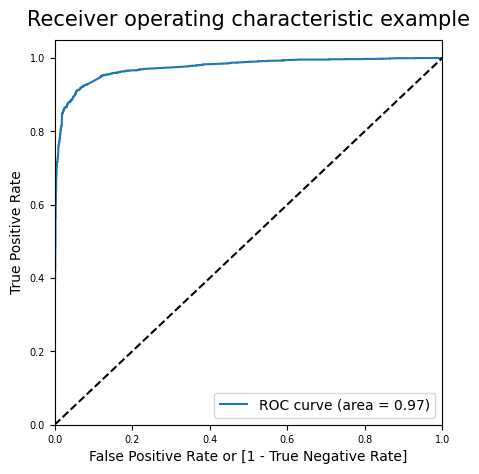

In [114]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_prob"])

#### Inference :  Area under ROC curve is 0.97, and it indicates a good predictive model

### 7.5 Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [115]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.146,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.056,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.002,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.930,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.996,7987,1,1,1,1,1,1,1,1,1,1,1


In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

       prob  accuracy  sensi  speci
0.000 0.000     0.385  1.000  0.000
0.100 0.100     0.860  0.966  0.793
0.200 0.200     0.907  0.950  0.880
0.300 0.300     0.927  0.916  0.934
0.400 0.400     0.929  0.902  0.946
0.500 0.500     0.930  0.883  0.960
0.600 0.600     0.931  0.865  0.973
0.700 0.700     0.930  0.850  0.980
0.800 0.800     0.913  0.798  0.985
0.900 0.900     0.896  0.745  0.991


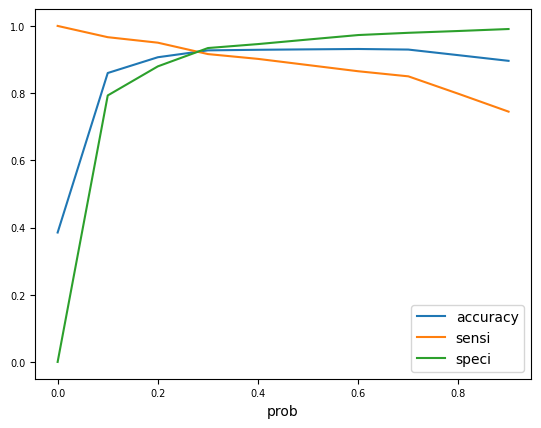

In [117]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### 0.3 is the optimum point to take it as a cutoff probability

### 7.5.1 Calculating all metrics using cut off prob of 0.3

In [118]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_prob'].map( lambda x: 1 if x > 0.3 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,final_predicted
0,0,0.146,3009,0,0
1,0,0.056,1012,0,0
2,0,0.002,9226,0,0
3,1,0.930,4750,1,1
4,1,0.996,7987,1,1


In [119]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

0.9272555503070382


In [120]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3648,  257],
       [ 205, 2241]])

In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9161896974652494

In [123]:
# Let us calculate specificity
TN / float(TN+FP)

0.9341869398207426

##### Recall

In [124]:
# Recall 
TP / float(TP+FN)

0.9161896974652494

##### Precision

In [125]:
# Precision 
print (TP / float(TP+FP))

0.8971176941553243


In [126]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.06581306017925737


In [127]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9467947054243446


In [128]:
# Precision Or Positive predictive value 
print (TP / float(TP+FP))

0.8971176941553243


### 7.6 Precision and recall tradeoff

In [129]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

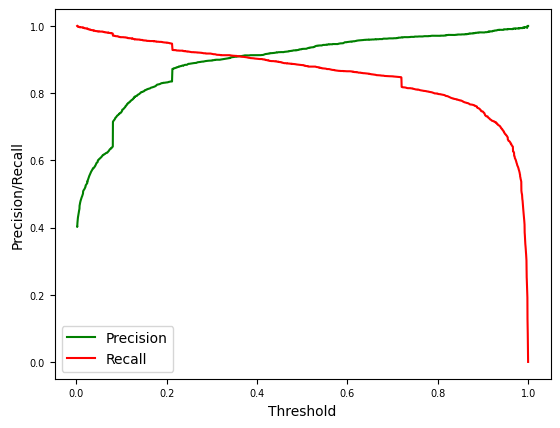

In [130]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

#### Trade-off between the Precision and Recall : probability threshold is approx 0.3 from above curve.


## Step 8: Making predictions on the test set

### 8.1 Scaling Test dataset

In [131]:
# using standard scaler for scaling the numerical column data
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [132]:
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm[X_train_sm.columns]
X_test_sm.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Other,Last Notable Activity_SMS Sent
3271,1.000,0,-0.591,0,0,0,0,0,0,0,0,0,1,0,0
1490,1.000,0,1.894,0,0,0,0,0,0,0,0,1,1,0,0
7936,1.000,0,-0.743,0,0,0,0,0,0,0,0,0,1,0,0
4216,1.000,0,-0.879,1,0,0,1,0,0,0,0,0,0,0,0
3830,1.000,0,-0.578,0,0,0,0,0,0,0,0,0,1,0,0


In [133]:
## Making predictions on the test set

In [134]:
# making prediction using final model
y_test_pred = logm1.predict(X_test_sm)

In [135]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
3271,0.094
1490,0.995
7936,0.080
4216,0.992
3830,0.095


In [136]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0


In [137]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index


In [138]:

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [139]:
# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.094
1,1,1490,0.995
2,0,7936,0.080
3,1,4216,0.992
4,0,3830,0.095


In [140]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,3271,0,0.094
1,1490,1,0.995
2,7936,0,0.080
3,4216,1,0.992
4,3830,0,0.095


In [141]:
# Using 0.3 probability cutoff
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,3271,0,0.094,0
1,1490,1,0.995,1
2,7936,0,0.080,0
3,4216,1,0.992,1
4,3830,0,0.095,0


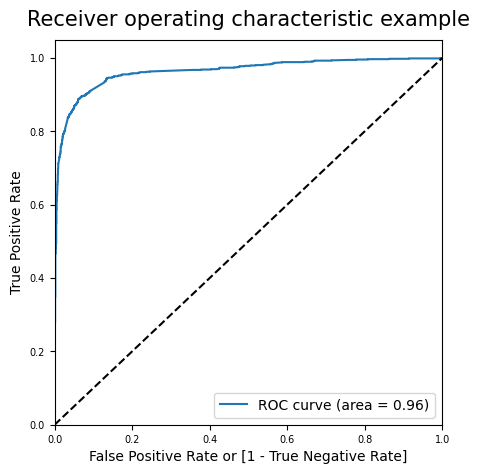

In [142]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

#### Inference :  Area under ROC curve is 0.96, and it indicates a good predictive model

In [143]:
confusion5 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])

In [144]:
TP = confusion5[1,1] # true positive 
TN = confusion5[0,0] # true negatives
FP = confusion5[0,1] # false positives
FN = confusion5[1,0] # false negatives

In [145]:
# Overall accuracy.
accuracy = (TN+TP)/(TN+TP+FN+FP)
accuracy

0.9155343371281675

In [146]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8968655207280081

In [147]:
# Let us calculate specificity
TN / float(TN+FP)

0.9261822376009228

In [148]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07381776239907728


In [149]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9402810304449649


##### Recall

In [150]:
# Recall 
TP / float(TP+FN)

0.8968655207280081

##### Precision

In [151]:
# Precision 
print (TP / float(TP+FP))

0.8738916256157635


### Metrix comparison


### <strong><span style="color:purple">Train Data Set:</span></strong>            

- <strong><span style="color:Green">Accuracy:</span></strong> 93%

- <strong><span style="color:Green">Sensitivity:</span></strong> 92%

- <strong><span style="color:Green">Specificity:</span></strong> 93%

### <strong><span style="color:purple">Test Data Set:</span></strong> 

- <strong><span style="color:Green">Accuracy:</span></strong> 92%

- <strong><span style="color:Green">Sensitivity:</span></strong> 90%

- <strong><span style="color:Green">Specificity:</span></strong> 93%




## Summary
The model sensitivity of 92% in the train data set and 90% in the test set, using a cut-off value of 0.3.
Sensitivity indicates how many leads the model could identify correctly.
The CEO of X Education had set a target sensitivity of arounds 80%.
The model also achieved an accuracy of 93%, which beats the threshold.